In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display

In [4]:
dataframe = pd.read_csv('PokemonDB.csv')
dataframe.head()

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,45,49,49,65,65,45
1,Ivysaur,Grass,60,62,63,80,80,60
2,Venusaur,Grass,80,82,83,100,100,80
3,Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65


# otra vez sin nulos

In [5]:
dataframe.isnull().sum()

Name       0
Type       0
HP         0
Attack     0
Defense    0
Sp. Atk    0
Sp. Def    0
Speed      0
dtype: int64

1190 pokemones y sus estadisticas

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     1190 non-null   object
 1   Type     1190 non-null   object
 2   HP       1190 non-null   int64 
 3   Attack   1190 non-null   int64 
 4   Defense  1190 non-null   int64 
 5   Sp. Atk  1190 non-null   int64 
 6   Sp. Def  1190 non-null   int64 
 7   Speed    1190 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 74.5+ KB


In [7]:
dataframe.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,70.852941,80.957983,74.586555,72.756303,72.050420,69.695798
std,26.886443,32.119650,30.718212,32.658636,27.637522,30.204376
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,51.250000,56.000000,51.000000,50.000000,50.000000,45.000000
50%,70.000000,80.000000,70.000000,65.000000,70.000000,67.000000
75%,85.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


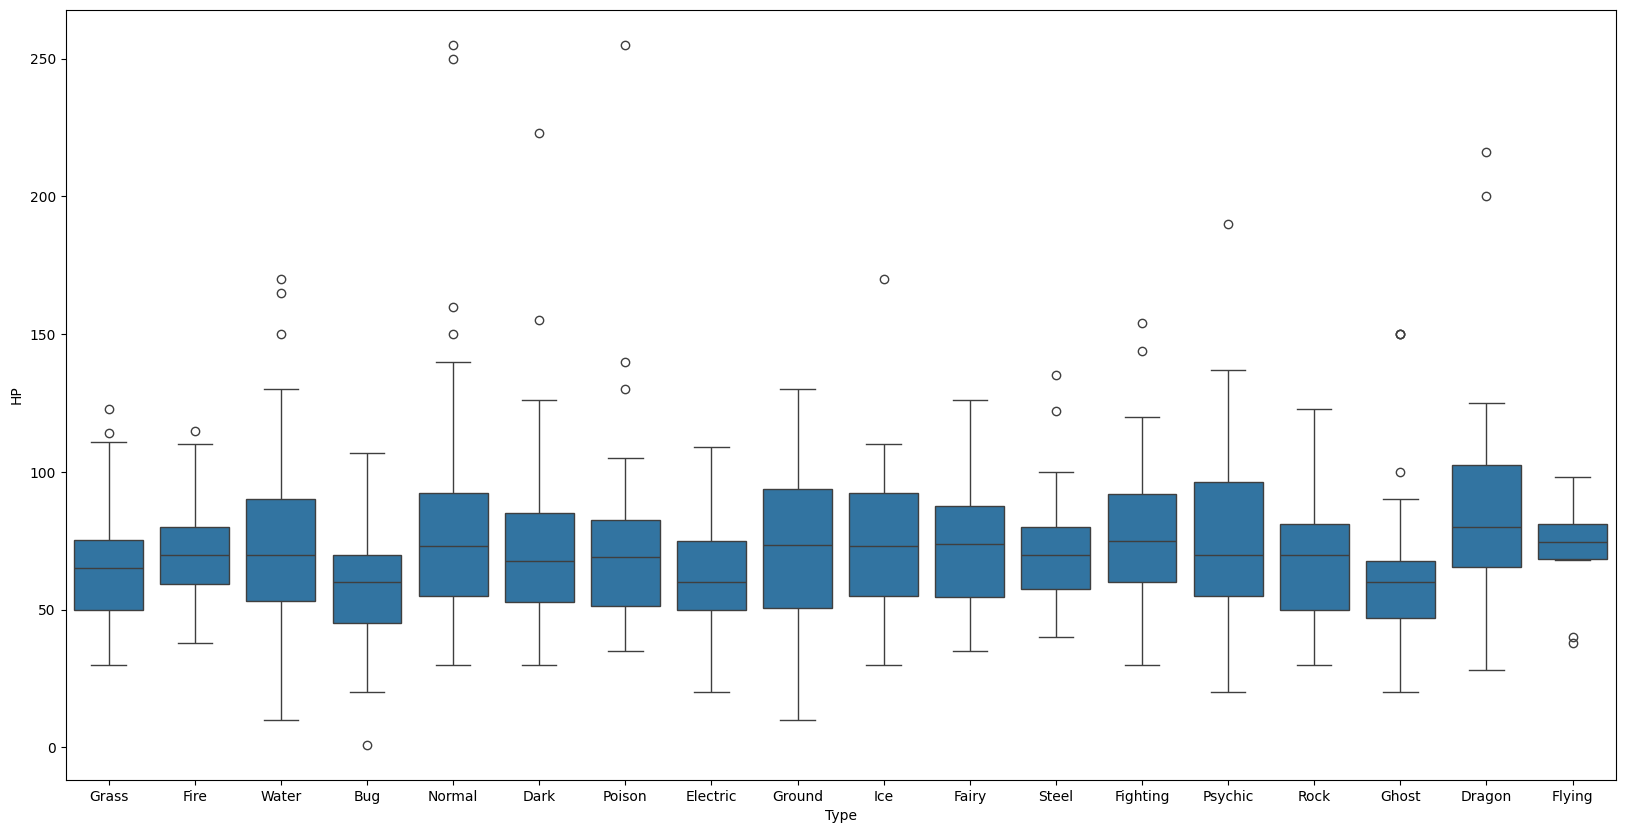

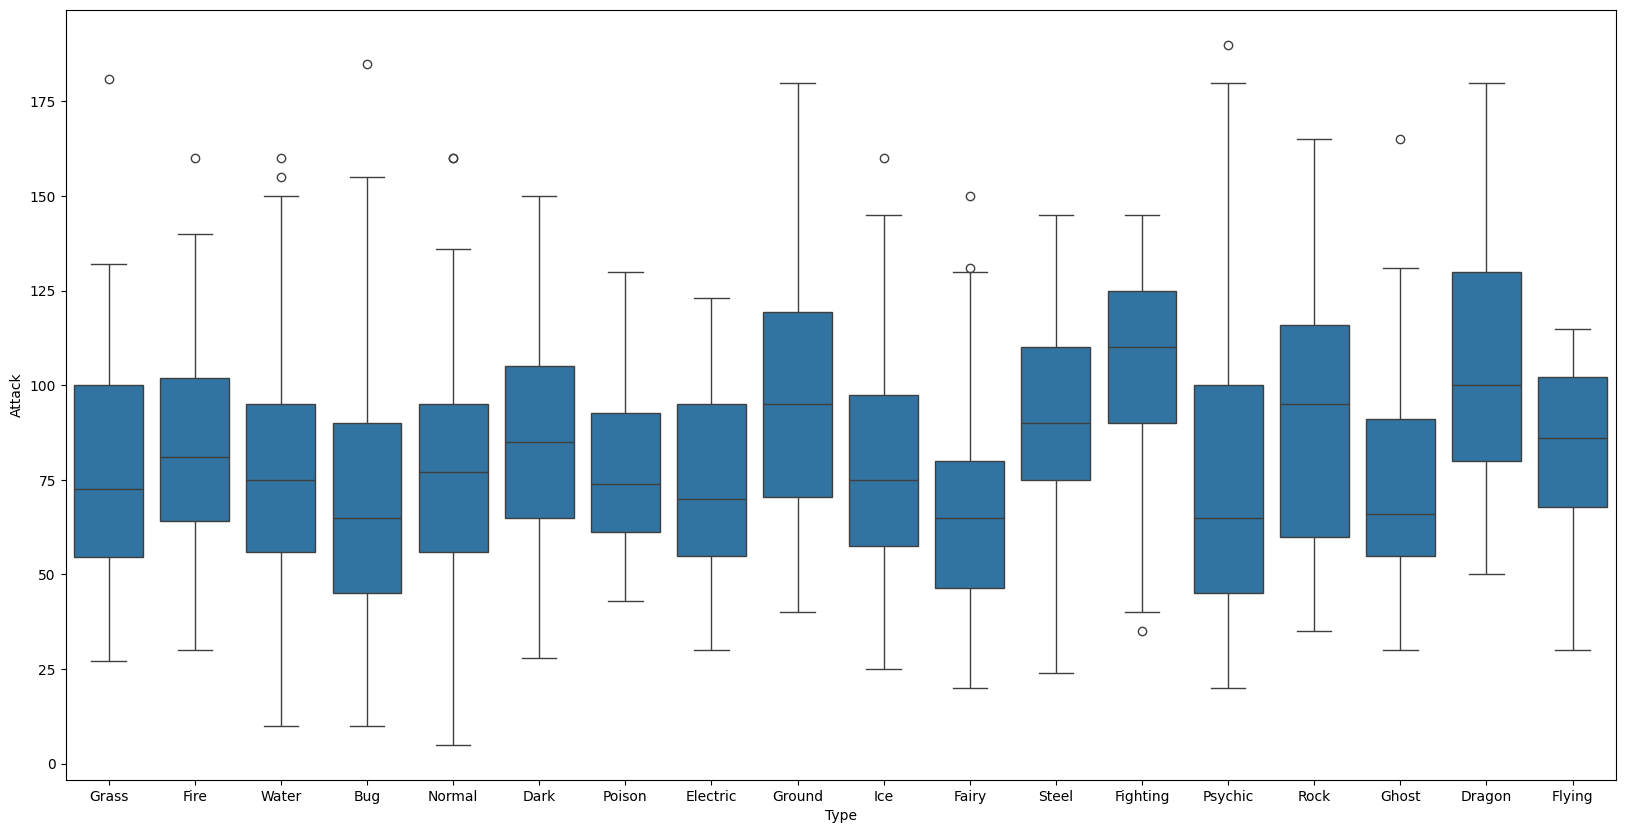

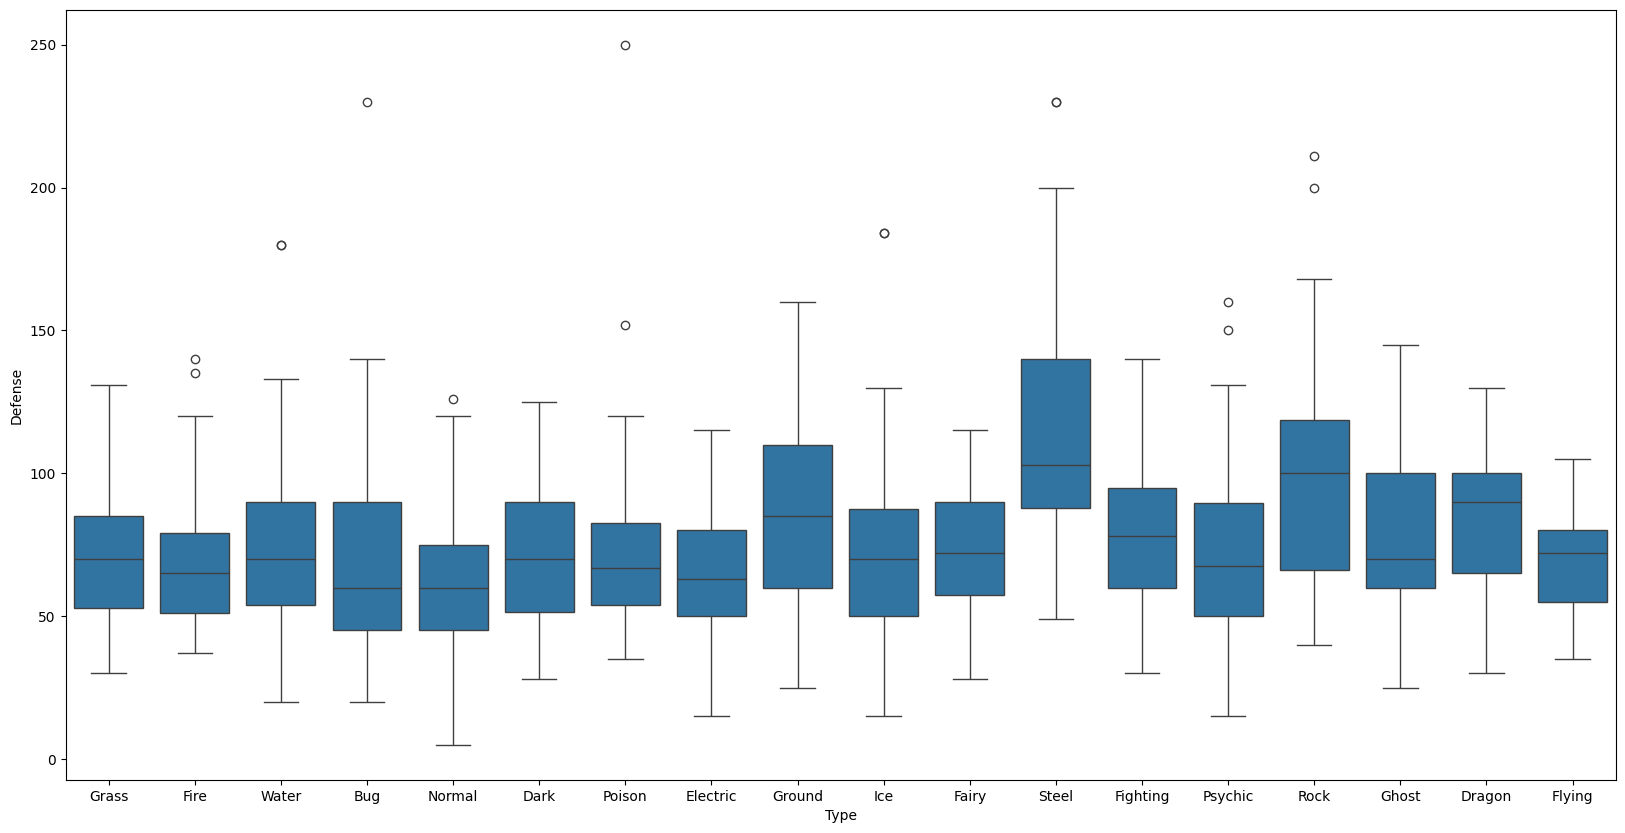

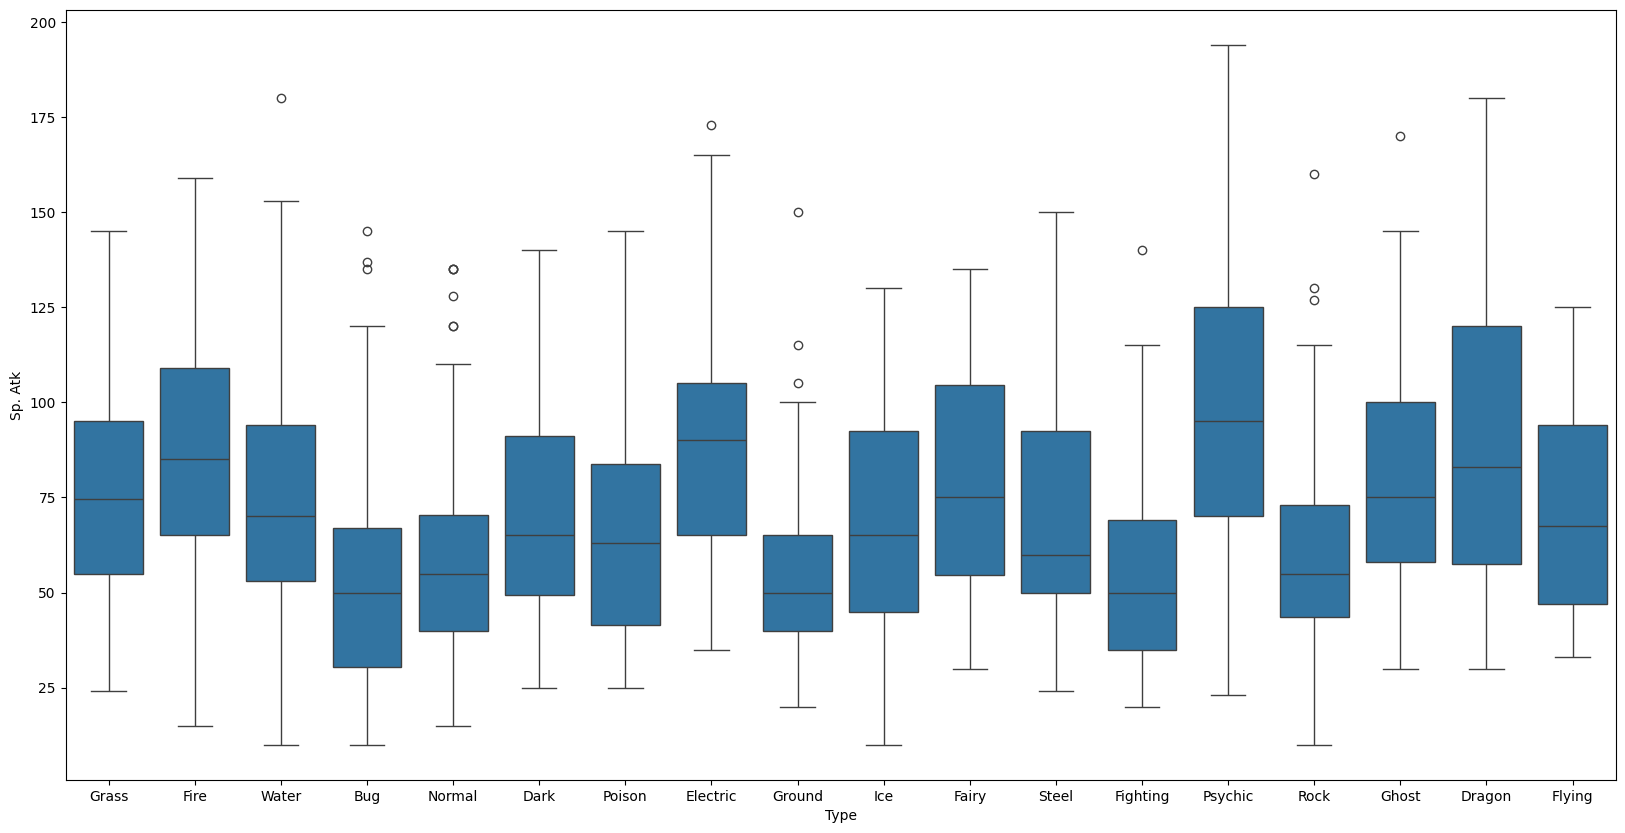

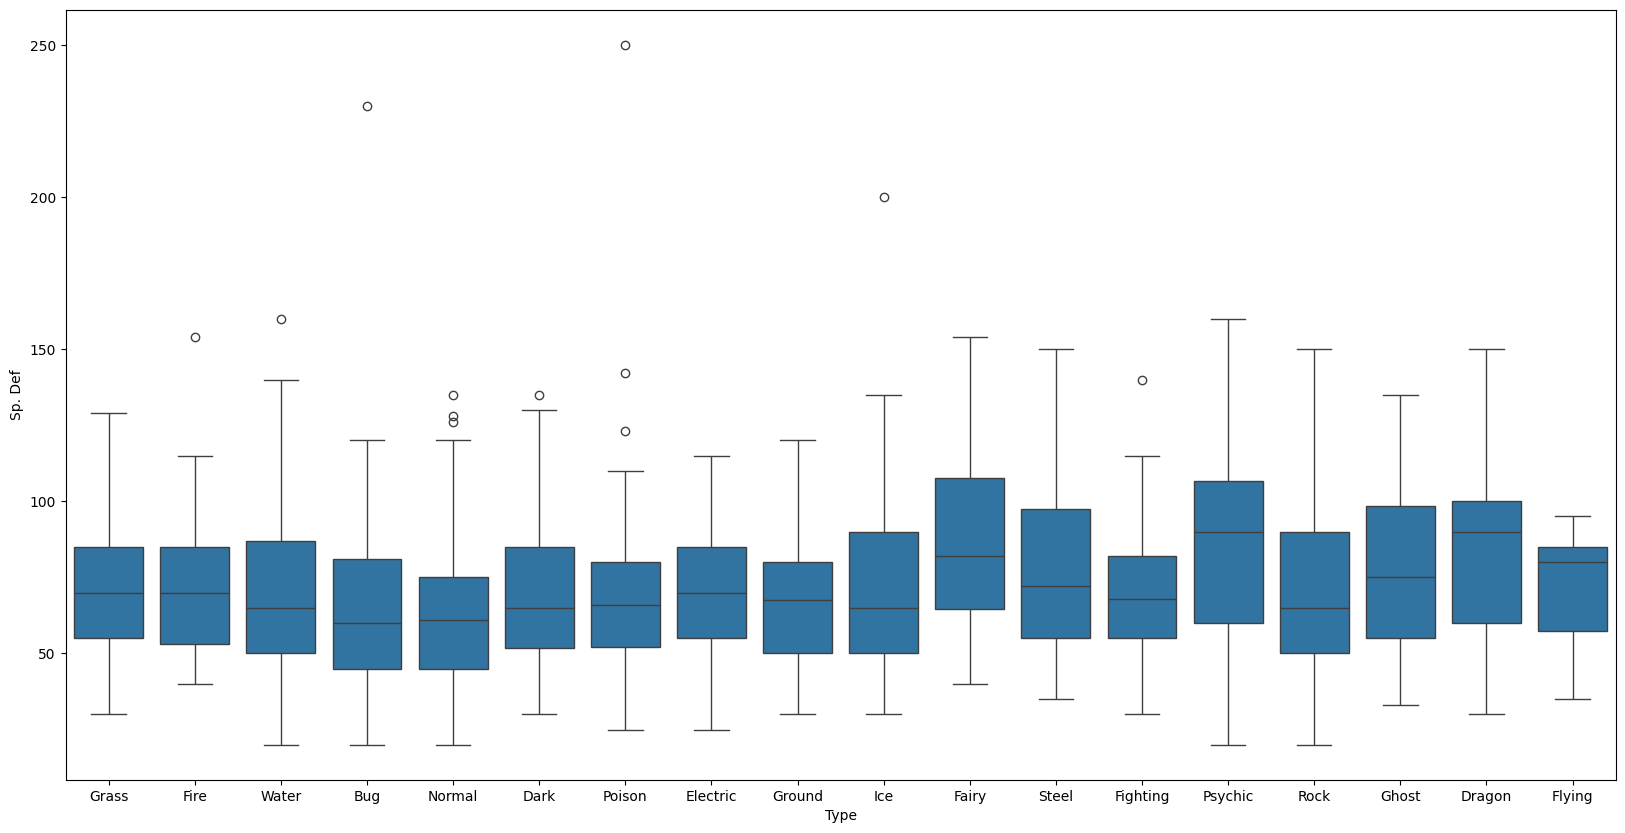

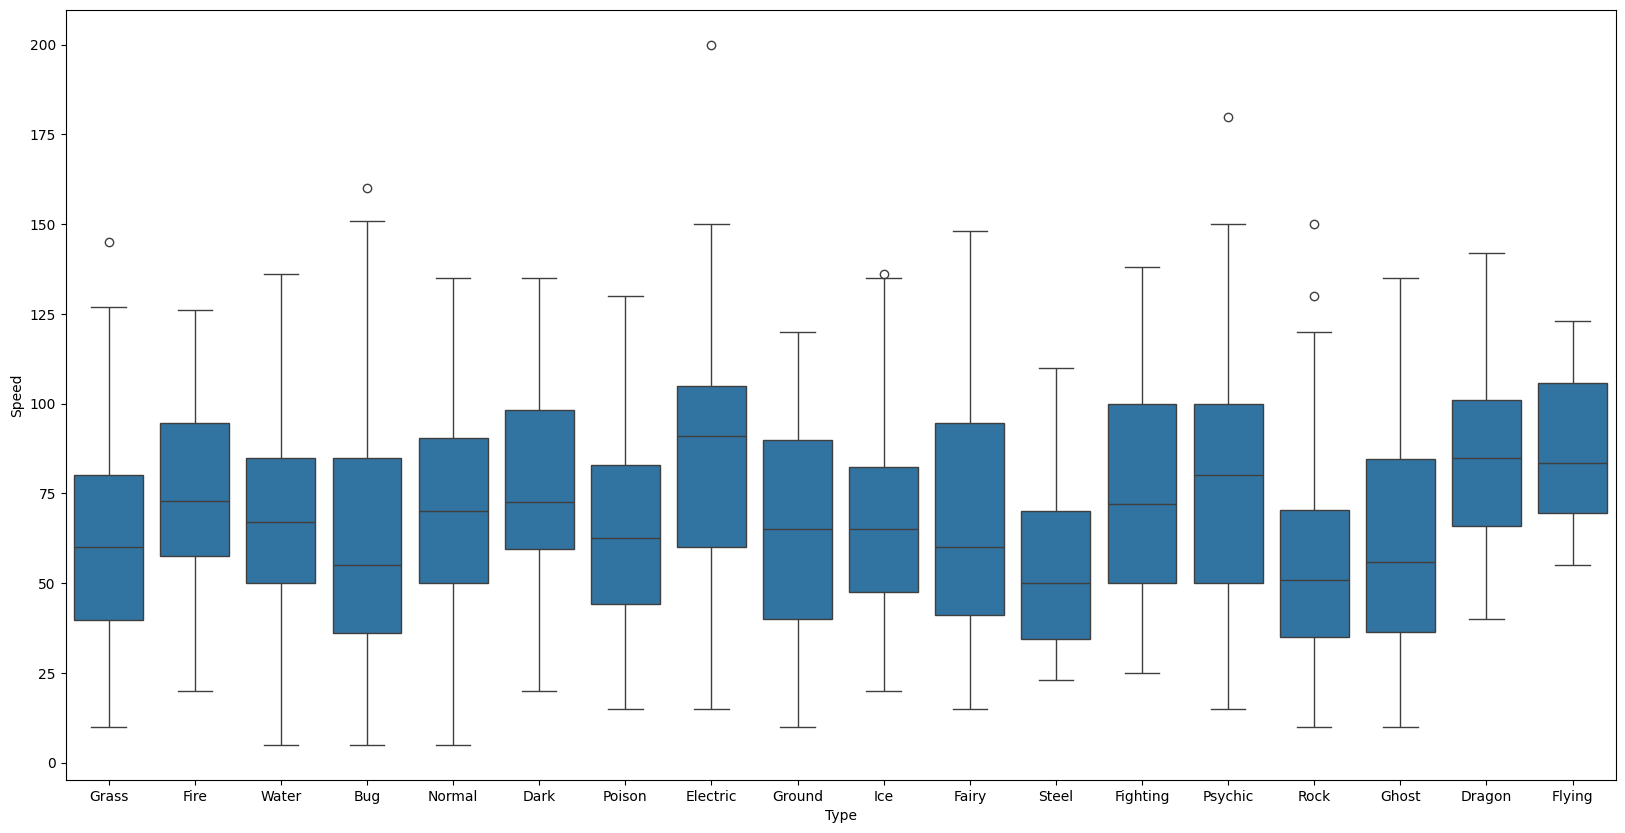

In [8]:
for columna in dataframe[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]:
    plt.figure(figsize=(20,10))
    sns.boxplot(x='Type',y=columna, data=dataframe)

- HP: los que son dragones son los que mas hp tienen, bug y ghost son los que menos tienen.

- Attack: Fighting y Dragon son los que tienen mas puntos de ataque basico, bug, ghost y psychic tienen el ataque basico mas bajo.

- Defense: Steel y Rock tienen mas defensa base, mientras que bug y normal son los que menos tienen

- Sp. Atk: Psychic tienen el ataque especial mas alto, pero apenas destaca del resto.

- Sp. Def: Psychic y Dragon tienen defensa especial mas alta. Apenas un poco mas que el resto.

- Speed: Electric son los mas rapidos. Rock and Steel los mas lentos

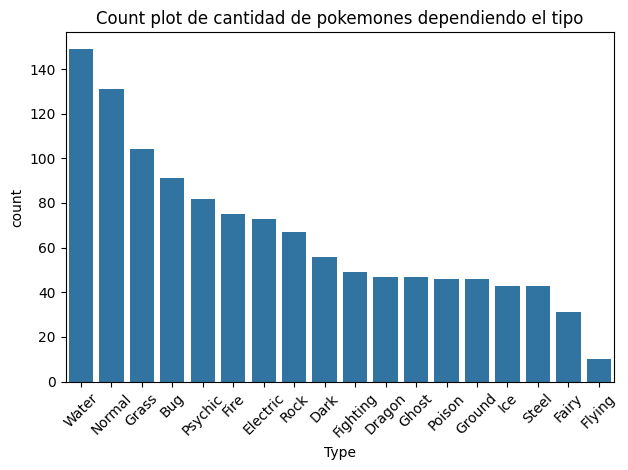

In [9]:
sns.countplot(dataframe, x='Type', order=dataframe['Type'].value_counts().index)
plt.title("Count plot de cantidad de pokemones dependiendo el tipo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Vemos que Water, Normal y Grass tienen mas de 100 pokemones en los ejercicios 3 4 y 5 tenemos que predecir type, los resultados quizas se vean afectados por tener un desbalance de clases

In [13]:
heatmapdf = dataframe[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def']]
corr = heatmapdf.corr()

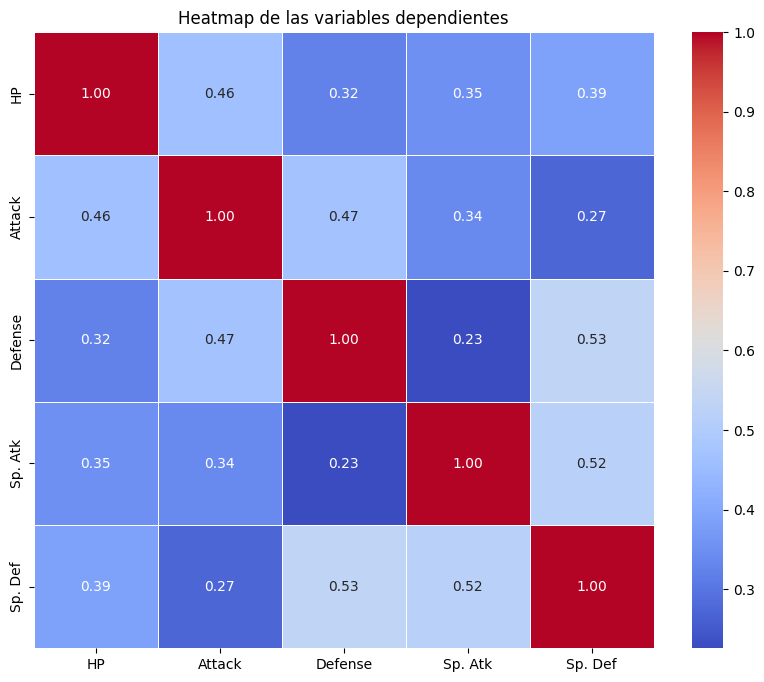

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de las variables dependientes')
plt.show()

In [10]:
df_sub = dataframe[dataframe.describe().columns]

dataframe_escalado = (df_sub-df_sub.mean())/df_sub.std()

In [11]:
dataframe_escalado

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.961561,-0.994967,-0.832944,-0.237496,-0.255103,-0.817623
1,-0.403659,-0.590230,-0.377188,0.221800,0.287637,-0.321006
2,0.340211,0.032442,0.273891,0.834196,1.011291,0.341149
3,0.340211,0.592846,1.576050,1.507831,1.734945,0.341149
4,-1.184721,-0.901566,-1.028268,-0.390595,-0.797844,-0.155467
...,...,...,...,...,...,...
1185,-0.589626,-0.029825,0.176229,1.905888,1.734945,1.003305
1186,1.270047,1.807056,-0.116757,-0.543694,1.047474,1.632353
1187,0.117050,1.526854,0.501769,1.446591,-0.436017,1.533030
1188,1.084080,1.682522,1.315618,0.374899,1.011291,2.162077


In [12]:
dataframe_escalado.columns

Index(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object')

In [13]:
X = dataframe_escalado
Y = dataframe['Type']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
default_knn = KNeighborsClassifier()

In [16]:
default_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred_default = default_knn.predict(X_test)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score
# Métricas
precision_default = precision_score(y_test, y_pred_default, average='macro')
recall_default = recall_score(y_test, y_pred_default, average='macro')
accuracy_default = accuracy_score(y_test, y_pred_default)

print("Modelo con parámetros por defecto")
print(f"Precisión: {precision_default:.2f}")
print(f"Exhaustividad (Recall): {recall_default:.2f}")
print(f"Exactitud (Accuracy): {accuracy_default:.2f}")


Modelo con parámetros por defecto
Precisión: 0.10
Exhaustividad (Recall): 0.11
Exactitud (Accuracy): 0.13


# Grid Search

In [19]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2, 3]  # Solo relevante para Minkowski
}

# Crear y ajustar el modelo con GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [21]:
# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7], 'p': [1, 2, 3]},
             scoring='accuracy')

#### mejores hiperparámetros

In [22]:
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

#### Volver a predecir

In [23]:
y_pred_best = best_knn.predict(X_test)

precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')
accuracy_best = accuracy_score(y_test, y_pred_best)

print("\nModelo con los mejores parámetros encontrados por Grid Search")
print(f"Mejores parámetros: {best_params}")
print(f"Precisión: {precision_best:.2f}")
print(f"Exhaustividad (Recall): {recall_best:.2f}")
print(f"Exactitud (Accuracy): {accuracy_best:.2f}")


Modelo con los mejores parámetros encontrados por Grid Search
Mejores parámetros: {'metric': 'manhattan', 'n_neighbors': 7, 'p': 1}
Precisión: 0.14
Exhaustividad (Recall): 0.13
Exactitud (Accuracy): 0.16
